Quality=  4.557142857142857


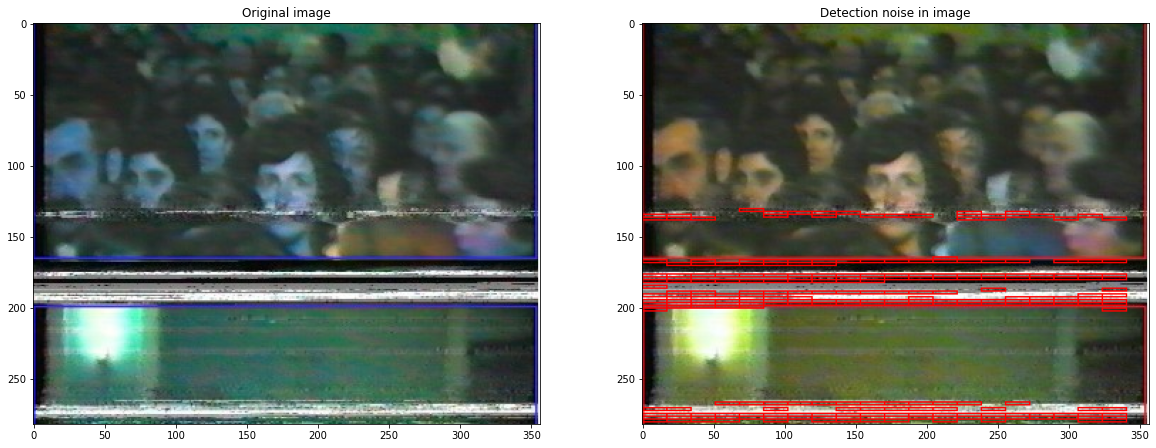

In [16]:
# %%
import matplotlib.pylab as plt
import numpy as np
import cv2


# %% 
#plt.figure()

original_image=cv2.imread('test4.jpg',cv2.IMREAD_COLOR)
image = original_image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel = np.array([[1,-1,1],[-1,1,-1]]) / 6
img = cv2.filter2D(image, -1, kernel)

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#print(imgGray.shape)
imgGray = imgGray.astype("uint8")
thresh_img = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
def iterateOntheImage(start1,start2,thresh_img,image,step1,step2):
    windowSize1=int(thresh_img.shape[0]/step1)
    windowSize2= int(thresh_img.shape[1]/step2)
    pixel_value=thresh_img[start1:windowSize1+start1,0+start2:windowSize2+start2]
    numOfWhite=np.count_nonzero(pixel_value == 255)
    score=numOfWhite/(windowSize1*windowSize2)
    return score
start_r=0
start_c=0
score=[]
windowSize1=int(thresh_img.shape[0]/100)
windowSize2= int(thresh_img.shape[1]/20)
Maxscore=0
total=0
while(start_c+windowSize2<thresh_img.shape[1]):
    start_r=0
    while(start_r+windowSize1<thresh_img.shape[0]):
        score.append(iterateOntheImage(start_r,start_c,thresh_img,image,100,20))
        total+=1 
        #cv2.rectangle(image, (start_c,start_r), (windowSize2+start_c,windowSize1+start_r), (0, 0,255),1)
        start_r=start_r+windowSize1
    start_c=start_c+windowSize2
Maxscore=np.max(score)
#print(Maxscore)
start_r=0
start_c=0
quality=0
while(start_c+windowSize2<thresh_img.shape[1]):
    start_r=0
    while(start_r+windowSize1<thresh_img.shape[0]):
        if(iterateOntheImage(start_r,start_c,thresh_img,image,100,20)>0.2*Maxscore and Maxscore>0.3):
            a=2
            cv2.rectangle(image, (start_c,start_r), (windowSize2+start_c,windowSize1+start_r), (255, 0,0))
            quality+=1
        start_r=start_r+windowSize1
    start_c=start_c+windowSize2
#print(total," ",quality)
quality=(total-quality)/total*5
fig, ax = plt.subplots(ncols=2,figsize=(20,20))
ax[0].imshow(original_image.astype(int))
ax[0].title.set_text("Original image")
ax[1].imshow(image.astype(int))
ax[1].title.set_text("Detection noise in image")

print("Quality= ",quality)
